In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
mniste = tf.keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mniste.load_data()

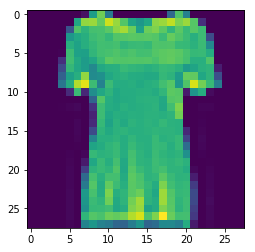

In [5]:
plt.imshow(x_train[10])

# two times convolution and pooling 

In [27]:

class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,log={}):
        if(log.get('acc')>0.99):
            print('accu more then 99%')
            self.model.stop_training=True

callback =mycallback()
mniste = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mniste.load_data()
#irst convolution expects a single tensor containing everything
x_train =x_train.reshape(60000,28,28,1)
x_test =x_test.reshape(10000,28,28,1)
x_train=x_train/255.0
x_test=x_test/255.0

model = tf.keras.models.Sequential(layers=[
    #convolution 
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(2,2),
    
    # feed data to neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,callbacks =[callback])
model.evaluate(x_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 125)               200125    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1260      
Total para

[0.3059297052145004, 0.9053]

In [104]:
model.evaluate(x_train,y_train)

60000/60000 [==============================] - 6s 97us/sample - loss: 0.0890 - acc: 0.9668


[0.08895509006952246, 0.96685]

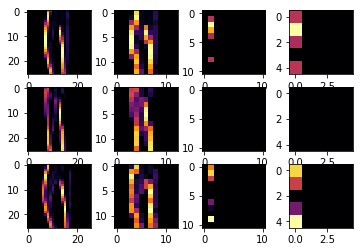

In [103]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=2
SECOND_IMAGE=3
THIRD_IMAGE=5
CONVOLUTION_NUMBER = 5
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
        f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
        axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[0,x].grid(False)
        f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
        axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[1,x].grid(False)
        f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
        axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
        axarr[2,x].grid(False)

In [106]:
# only one time convolution and pooling

In [110]:

class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,log={}):
        if(log.get('acc')>0.998):
            print('accu more then 99.8%')
            self.model.stop_training=True

callback =mycallback()
mniste = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mniste.load_data()
#irst convolution expects a single tensor containing everything
x_train =x_train.reshape(60000,28,28,1)
x_test =x_test.reshape(10000,28,28,1)
x_train=x_train/255.0
x_test=x_test/255.0

model = tf.keras.models.Sequential(layers=[
    #convolution 
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
   
    
    # feed data to neural network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,callbacks =[callback])
model.evaluate(x_test,y_test)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_31 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 12s 194us/sample - loss: 0.1373 - acc: 0.9592
Epoch 2/10
60000/60000 [====

[0.06208210123038843, 0.9852]